In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 1. Veri Seti Tanıma </p>

<div style="padding: 10px; background-color: #eee6ff; font-size:100%; text-align:left">
    
* Iris çiçek veri setini kullanacağız. 
* Iris veri seti veya Fisher Iris veri seti, 1936 tarihli makalesinde İngiliz istatistikçi, dijeni uzmanı ve biyolog Ronald Fisher tarafından tanıtılan çok değişkenli bir veri setidir.
* İçerisinde üç farklı sınıf bulunmaktadır. Bunlar setosa, versicolor ve virginica'dır.

In [2]:
# Pandas kütüphanesini yükleleyim
import pandas as pd

In [3]:
# Veri setini yükleyelim 
veri = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<div style="padding: 10px; background-color: #eee6ff; font-size:100%; text-align:left">


- Her bir satır, bir çieğe ait ölçüm değerlerini gösterir.
- Özellikler sırasıyla SepalLengthCm (alt yaprak uzunluğu cm), SepalWidthCm (alt yaprak genişliği cm), PetalLengthCm (üst yaprak uzunluğu cm), PetalWidthCm (üst yaprak genişlik cm).
- Sınıflarımız ise setosa, versicolor, virginica.

In [4]:
# Sütunların isimleri
veri.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Veri içerisinde kaç tane sınıf olduğuna bakalım
veri.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Veri ile ilgili bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Veri ile ilgili istatistiksel çıkarımlar
veri.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 2. Çizgi Grafiği </p>
* Birbirine bağlanan düz çizgi parçalarının veri noktaları serisinin bilgisini gösteren bir tür çizimdir.

In [8]:
# Matplotlib kütüphanesini yükleyelim 
import matplotlib.pyplot as plt

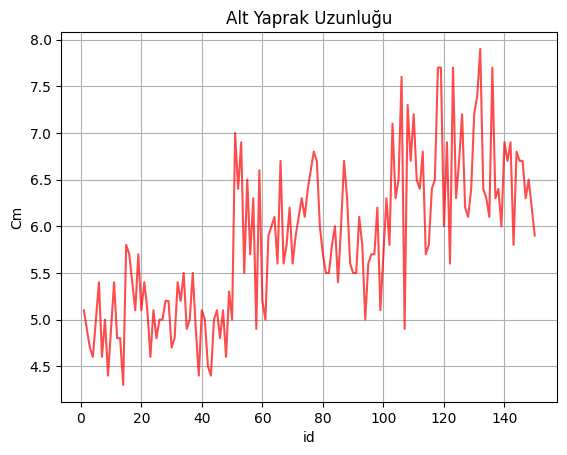

In [9]:
# Sepal Length sütununu id'ye göre çizdirelim
plt.figure()  # Figür oluştur - dış çerçeve
plt.plot(veri["Id"], veri['SepalLengthCm'], color = "red", alpha = 0.7)  # alpha = saydamlık
plt.title('Alt Yaprak Uzunluğu') # Başlık
plt.xlabel("id")
plt.ylabel("Cm")
plt.grid(True) # Izgara var
plt.show()

# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 3. Saçılım Grafiği </p>
*  İki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır.
*  Aralarındaki ilişkinin sebebi görülemese de, ilgili iki değişkenin arasında direkt olarak bir ilişki bulunup bulunmadığı ve bu ilişnin ne derece olduğu görülebilir.

In [10]:
# Kütüphaneleri içe aktaralm
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Veri setimizi tekrar çağıralım
veri = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


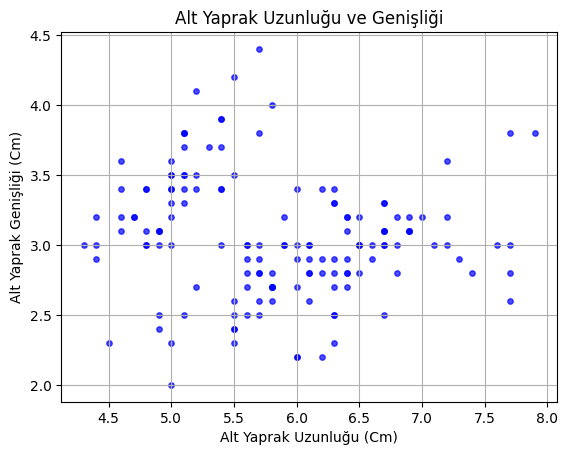

In [12]:
# Sepal Width sütununu Selap Length'e göre çizdirelim
plt.figure() # figür oluştur - dış çerçeve
plt.scatter(veri["SepalLengthCm"], veri['SepalWidthCm'], color = "blue", s = 15, alpha = 0.7) # alpha = saydamlık, s = size
plt.title("Alt Yaprak Uzunluğu ve Genişliği") # Başlık
plt.xlabel("Alt Yaprak Uzunluğu (Cm)")
plt.ylabel("Alt Yaprak Genişliği (Cm)")
plt.grid(True) # Izgara var
plt.show()

# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 4. Histogram Grafiği  </p>
* Gruplandırılmış bir veri dağılımının sütun grafiğiyle gösterimidir.
* Diğer bir ifade ile, tekrarlı sayılardan oluşan verilerin, uygulanan işlemlerden sonra  önce tabloya, tablodan yararlanarak grafiğe aktarılması, yani gruplarının grafiğinin dikförtgen sütunlar halinde gösterilmesidir.


In [13]:
# Kütüphaneleri içe aktaralm
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Veri setimizi tekrar çağıralım
veri = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


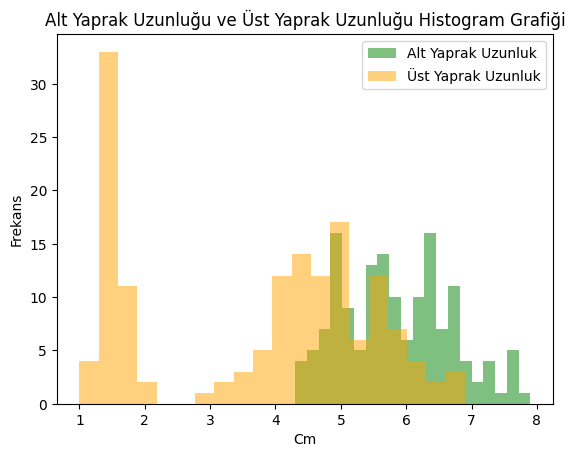

In [15]:
# Sepal Lenght ve Petal Lenght sütunlarının histogram  grafiğini çizdirelim
plt.figure() # figür oluştur - dış çerçeve
plt.hist(veri["SepalLengthCm"], color = "green", alpha = 0.5, bins = 20, label = "Alt Yaprak Uzunluk") # alpha = saydamlık, bins = aralık
plt.hist(veri["PetalLengthCm"], color = "orange", alpha = 0.5, bins = 20, label = "Üst Yaprak Uzunluk") # alpha = saydamlık, bins = aralık
plt.title("Alt Yaprak Uzunluğu ve Üst Yaprak Uzunluğu Histogram Grafiği") # Başlık
plt.xlabel("Cm")
plt.ylabel("Frekans")
plt.legend() # Label'ların görünebilmesi için
plt.show()

# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 5. Çubuk Grafiği  </p>
* Kategorik verileri temsil ettikleri değerlerle orantılı yükseklik ve uzunluktaki dikdörtgen çubuklarla sunan bir grafiktir.
* Çubuklar dikey veya yatay olarak çizilebilir.

In [16]:
# Kütüphaneleri içe aktaralm
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Veri setimizi tekrar çağıralım
veri = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Veri ile ilgili istatistiksel çıkarımlar
veri_sutun_listesi = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
tanim = veri.describe()
tanim

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
# Alt yaprak uzunluk ve genişlik, Üst yaprak uzunluk ve genişlik ortalama değerlerini bulalım
ortalama = tanim.iloc[1,[1,2,3,4]]
ortalama

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
Name: mean, dtype: float64

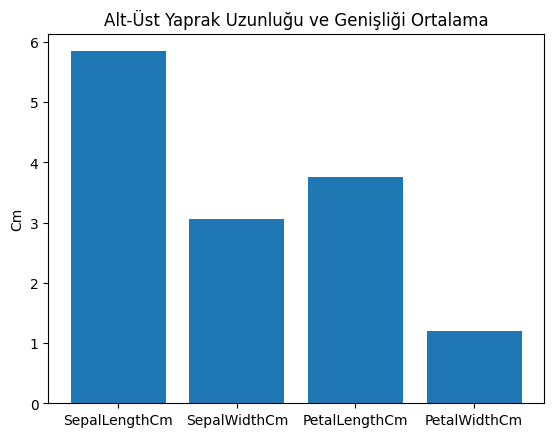

In [20]:
# Alt-Üst yaprak uzunluk ve genişlik değerlerinin ortalamalarını çubuk grafiği ile çizdirelim
plt.figure() # figür oluştur - dış çerçeve
plt.bar(veri_sutun_listesi, ortalama)
plt.title("Alt-Üst Yaprak Uzunluğu ve Genişliği Ortalama")
plt.ylabel("Cm")
plt.show()

# <p style="background-color:#cbb3ff; font-family:newtimeroman;color:#110033; font-size:125%; border-radius: 50px 15px ; padding: 0 15px ; margin-bottom: 0;"> 6. Alt Plan Grafiği  </p>
- Birden fazla grafik tek bir figür/çerçeve üzerinde bulunur.

In [21]:
# Kütüphaneleri içe aktaralm
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Veri setimizi tekrar çağıralım
veri = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


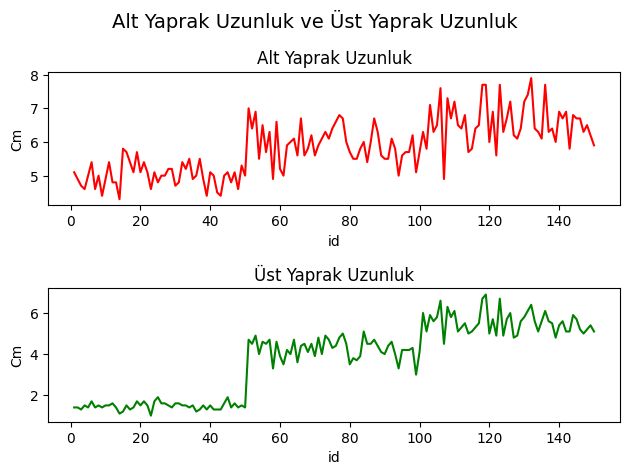

In [23]:
fig, ax = plt.subplots(2,1) # figür üzerine 2*1'lik bir tablo oluştur. Bu tablo üzerine ax(eksek) ekle
fig.suptitle("Alt Yaprak Uzunluk ve Üst Yaprak Uzunluk", fontsize = 14)
ax[0].plot(veri.Id, veri.SepalLengthCm, color = "red", label = "SepalLengthCm")
ax[0].set_title('Alt Yaprak Uzunluk') # Boşluk
ax[0].set_xlabel("id")
ax[0].set_ylabel("Cm")

ax[1].plot(veri.Id, veri.PetalLengthCm, color = "green", label = "PetalLengthCm")
ax[1].set_title('Üst Yaprak Uzunluk') # Boşluk
ax[1].set_xlabel("id")
ax[1].set_ylabel("Cm")

fig.tight_layout() # Figür arası yerleşimi ayarla
fig.subplots_adjust(top = 0.85)
plt.show()